In [1]:
import numpy as np
import matplotlib.pyplot
import random
import math

In [2]:
# Used to convert integer to binary string
bin8 = lambda x : ''.join(reversed( [str((x >> i) & 1) for i in range(8)] ) )

In [3]:
# To calculate fitness function 1 
def fitness_fun1(x):
  return math.sin(math.pi * x/256)

# To calculate fitness function 2
def fitness_fun2(x,y):
  return -1 * ((x-3.14)**2 + (y-2.72)**2 + math.sin(3*x + 1.41) + math.sin(4*y - 1.73))

In [4]:
# Function to computer xor
def xor_c(a, b):
    return '0' if(a == b) else '1';
 
# Function to flip bit
def flip(c):
    return '1' if(c == '0') else '0';
 
# Function to convert from binary to gray code
def binarytoGray(binary):
    gray = "";
    gray += binary[0];

    for i in range(1, len(binary)):
        gray += xor_c(binary[i - 1],
                      binary[i]);
 
    return gray;

# Helper Function to convert from gray code to binary
def flip_num(my_nu):
   return '1' if(my_nu == '0') else '0';

# Function to convert from gray code to binary
def gray_to_binary(gray):
   binary_code = ""
   binary_code += gray[0]
   for i in range(1, len(gray)):

      if (gray[i] == '0'):
         binary_code += binary_code[i - 1]
      else:
         binary_code += flip_num(binary_code[i - 1])

   return binary_code

def binaryToDecimal(x):
    return int(x, 2)

In [5]:
isGrayCode = False
num_parents_mating = 4
num_weights = 8

In [6]:
# Function to generate Population for fitness function 1
def generatePopulationForFunc1():
  population_matrix = np.array([])
  for _ in range(8):
    x = random.randint(0,255)
    if(isGrayCode):
      bin = binarytoGray(bin8(x))
    else:
      bin = bin8(x)
    population_matrix = np.append(population_matrix, bin)
  return population_matrix

In [7]:
# Function to generate Population for fitness function 2
def generatePopulationForFunc2():
  population_matrix = np.array([])
  for _ in range(8):
    x = random.randint(-5,5)
    y = random.randint(-5,5)
    individual = np.array([x,y])
    if(population_matrix.shape[0] == 0):
      population_matrix = individual
    else:
      population_matrix = np.vstack((population_matrix, individual))
  return population_matrix

In [8]:
# Function to calculate fitness of population for fitness function 1
def calculatePopFitnessFunction1(pop):
    population_fitness = np.array([])
    for i in range(len(pop)):
        func1Output = fitness_fun1(binaryToDecimal(pop[i]))
        population_fitness = np.append(population_fitness,func1Output)
    return population_fitness

# Function to calculate fitness of population for fitness function 2
def calculatePopFitnessFunction2(pop):
    population_fitness = np.array([])
    for i in range(len(pop)):
        func2Output = fitness_fun2(pop[i][0], pop[i][1])
        population_fitness = np.append(population_fitness,func2Output)
    return population_fitness

In [9]:
# Function to select parents with highest fitness of population function 1
def select_mating_pool(pop, fitness, num_parents):
  parents = np.array([])
  for _ in range(num_parents):
    max_fitness_idx = np.where(fitness == np.max(fitness))[0][0]
    parents = np.append(parents,pop[max_fitness_idx])
    fitness[max_fitness_idx] = -99999999999
  return parents

# Function to select parents with highest fitness of population function 2
def select_mating_pool_func2(pop, fitness, num_parents):
  parents = np.array([])
  for _ in range(num_parents):
    max_fitness_idx = np.where(fitness == np.max(fitness))[0][0]
    if(parents.shape[0] == 0):
      parents = pop[max_fitness_idx]
    else:
      parents = np.vstack((parents, pop[max_fitness_idx]))
    fitness[max_fitness_idx] = -99999999999
  return parents

In [10]:
# Function to compute fifty percent crossover for function 1
def fiftyPercentCrossoverFunctionOne(parents, offspring_size):
    offsprings = np.empty(offspring_size, dtype=object)
    crossover_point = int(len(parents[0]) / 2)
    for k in range(0, offspring_size, 2):
        parent1 = parents[k]
        parent2 = parents[k + 1]
        offsprings[k] = f'{parent1[0:crossover_point]}{parent2[crossover_point:]}'
        offsprings[k + 1] = f'{parent2[0:crossover_point]}{parent1[crossover_point:]}'
    return offsprings

# Function to compute fifty percent crossover for function 2
def fiftyPercentCrossoverFunctionTwo(parents, offspring_size):
    offsprings = np.array([])
    print(parents)
    for k in range(0, offspring_size, 2):
        parent1 = parents[k]
        parent2 = parents[k + 1]
        offspring1 = np.array([parent1[0],parent2[1]])
        offspring2 = np.array([parent2[0],parent1[1]])
        if(offsprings.shape[0] == 0):
            offsprings = offspring1
            offsprings = np.vstack((offsprings, offspring2))
        else:
            offsprings = np.vstack((offsprings, offspring1))
            offsprings = np.vstack((offsprings, offspring2))
    return offsprings

In [11]:
# Function to compute one point crossover for function 1
def onePointCrossover(parents, offspring_size):
    offspring = np.empty(offspring_size, dtype=object)
    crossover_point = np.random.randint(0,len(parents[0]))
    print(f'Crossover Point: {crossover_point}')
    for k in range(0, offspring_size, 2):
        parent1 = parents[k]
        parent2 = parents[k + 1]
        offspring[k] = f'{parent1[0:crossover_point]}{parent2[crossover_point:]}'
        offspring[k + 1] = f'{parent2[0:crossover_point]}{parent1[crossover_point:]}'
    return offspring

In [12]:
# Function to compute two point crossover for function 1
def twoPointCrossover(parents, offspring_size):
    offspring = np.empty(offspring_size, dtype=object)
    crossover_point1, crossover_point2 = random.sample(range(0, len(parents[0])), 2)
    print(f'Crossover Point 1: {crossover_point1}')
    print(f'Crossover Point 2: {crossover_point2}')
    for k in range(0, offspring_size, 2):
        parent1 = parents[k]
        parent2 = parents[k + 1]
        if(crossover_point1 < crossover_point2):
            offspring[k] = f'{parent1[0:crossover_point1]}{parent2[crossover_point1:crossover_point2]}{parent1[crossover_point2:]}'
            offspring[k + 1] = f'{parent2[0:crossover_point1]}{parent1[crossover_point1:crossover_point2]}{parent2[crossover_point2:]}'
        else:
            offspring[k] = f'{parent1[0:crossover_point2]}{parent2[crossover_point2:crossover_point1]}{parent1[crossover_point1:]}'
            offspring[k + 1] = f'{parent2[0:crossover_point2]}{parent1[crossover_point2:crossover_point1]}{parent2[crossover_point1:]}'
    return offspring

In [13]:
# For first function if value is greater than 255 or less than 0 bring back into range
def repairFunctionOne(x, range):
    value = 0
    if(isGrayCode):
        binaryOfGrayCode = gray_to_binary(x)
        value = binaryToDecimal(binaryOfGrayCode)
    else:
        value = binaryToDecimal(x)

    if(value > range[1]):
        value = range[1]

    elif(value < range[0]):
        value = range[0]

    if(isGrayCode):
        value = binarytoGray(bin8(value))
    else:
        value = bin8(value)
    return value

# For second function if value is greater than 5 or less than -5 bring back into range
def repairFunctionTwo(x, rangeValues):
    print(x)
    for i in range(len(x)):
        if x[i] < rangeValues[0]:
            x[i] = rangeValues[0]

        elif x[i] > rangeValues[1]:
            x[i] = rangeValues[1]
    return x

In [14]:
# Function to compute mutation for function 1
def mutationFunctionOne(offspring, probability):
    for i in range(len(offspring)):
        flipOrNot = True if random.random() < probability else False
        if(flipOrNot):
            offspring = offspring[0:i] + "0" + offspring[i+1:] if offspring[i] == "1" else offspring[0:i] + "1" + offspring[i+1:]
    return offspring

# Function to compute mutation for function 2
def mutationFunctionTwo(offspring, probability):
    for i in range(len(offspring)):
        flipOrNot = True if random.random() < probability else False
        if(flipOrNot):
            offspring[i] = random.randint(-5,5)
    return offspring

Generation :  0
Population Matrix
['00000110' '01011110' '10001101' '11011111' '11110101' '00111010'
 '01111001' '10001001']
Fitness
[0.07356456 0.91420976 0.98730142 0.39399204 0.13458071 0.65317284
 0.99631261 0.99390697]
Best Fitness: 0.996312612182778
Parents
['01111001' '10001001' '10001101' '01011110']
Crossover
['01111001' '10001001' '10001110' '01011101']
Mutation
['01111001' '00001001' '10001110' '01001101']
Generation :  1
Population Matrix
['01111001' '10001001' '10001101' '01011110' '01111001' '00001001'
 '10001110' '01001101']
Fitness
[0.99631261 0.99390697 0.98730142 0.91420976 0.99631261 0.11022221
 0.98527764 0.8104572 ]
Best Fitness: 0.996312612182778
Parents
['01111001' '01111001' '10001001' '10001101']
Crossover
['01111001' '01111001' '10001101' '10001001']
Mutation
['01111001' '01111001' '10001101' '10001001']
Generation :  2
Population Matrix
['01111001' '01111001' '10001001' '10001101' '01111001' '01111001'
 '10001101' '10001001']
Fitness
[0.99631261 0.99631261 0.

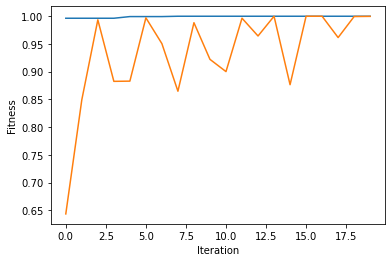

In [15]:
# Visualize the generations of the GA for the 1st objective function.
new_population = generatePopulationForFunc1()
new_population_fitness = np.array([])
best_outputs = []
best_average_outputs = []
num_generations = 20
num_parents_mating = 4
offspring_size = 4

for generation in range(num_generations):
    print("Generation : ", generation)

    print("Population Matrix")
    print(new_population)

    # Measuring the fitness of each chromosome in the population.
    population_fitness = calculatePopFitnessFunction1(new_population)
    print("Fitness")
    print(population_fitness)
    print("Best Fitness:", np.max(population_fitness))
    best_outputs.append(np.max(population_fitness))
    best_average_outputs.append(np.average(population_fitness))

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, population_fitness, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = fiftyPercentCrossoverFunctionOne(parents, offspring_size) if random.random() < 0.5 else onePointCrossover(parents, offspring_size)
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = np.array([])
    for i in range(len(offspring_crossover)):
        offspring_mutation = np.append(offspring_mutation, mutationFunctionOne(offspring_crossover[i], 0.05))
    print("Mutation")
    print(offspring_mutation)

    new_population = np.append(parents, offspring_mutation)

    for i in range(len(new_population)):
        new_population[i] = repairFunctionOne(new_population[i], [0 ,255])
    
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
new_population_fitness = calculatePopFitnessFunction1(new_population)

# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(new_population_fitness == np.max(new_population_fitness))[0][0]

print("Best solution : ", new_population[best_match_idx])
print("Best solution fitness : ", new_population_fitness[best_match_idx])

matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.plot(best_average_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

Generation :  0
Population Matrix
[[ 3  5]
 [ 0  0]
 [ 2  5]
 [-1  4]
 [-5 -2]
 [-4  2]
 [ 4 -5]
 [-5  4]]
Fitness
[ -3.83695275 -17.25774626  -6.85339613 -18.76937504 -87.98450306
 -52.40369104 -60.82687034 -68.03518875]
Best Fitness: 3.836952745094602
Parents
[[ 3  5]
 [ 2  5]
 [ 0  0]
 [-1  4]]
[[ 3  5]
 [ 2  5]
 [ 0  0]
 [-1  4]]
Crossover
[[ 3  5]
 [ 2  5]
 [ 0  4]
 [-1  0]]
Mutation
[[ 4  5]
 [ 2  5]
 [ 0  4]
 [-1  0]]
[3 5]
[2 5]
[0 0]
[-1  4]
[4 5]
[2 5]
[0 4]
[-1  0]
Generation :  1
Population Matrix
[[ 3  5]
 [ 2  5]
 [ 0  0]
 [-1  4]
 [ 4  5]
 [ 2  5]
 [ 0  4]
 [-1  0]]
Fitness
[ -3.83695275  -6.85339613 -17.25774626 -18.76937504  -6.13740826
  -6.85339613 -13.47629075 -22.55083055]
Best Fitness: 3.836952745094602
Parents
[[3 5]
 [4 5]
 [2 5]
 [2 5]]
[[3 5]
 [4 5]
 [2 5]
 [2 5]]
Crossover
[[3 5]
 [4 5]
 [2 5]
 [2 5]]
Mutation
[[3 5]
 [4 5]
 [2 5]
 [2 5]]
[3 5]
[4 5]
[2 5]
[2 5]
[3 5]
[4 5]
[2 5]
[2 5]
Generation :  2
Population Matrix
[[3 5]
 [4 5]
 [2 5]
 [2 5]
 [3 5]
 [4 5

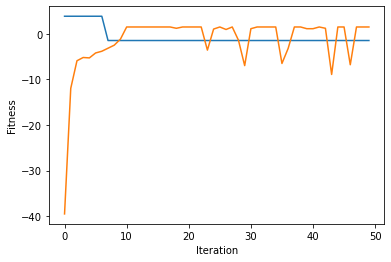

In [16]:
# Visualize the generations of the GA for the 2nd objective function.
new_population = generatePopulationForFunc2()
new_population_fitness = np.array([])
best_outputs = []
best_average_outputs = []
num_generations = 50
num_parents_mating = 4
offspring_size = 4

for generation in range(num_generations):
    print("Generation : ", generation)

    print("Population Matrix")
    print(new_population)

    # Measuring the fitness of each chromosome in the population.
    population_fitness = calculatePopFitnessFunction2(new_population)
    print("Fitness")
    print(population_fitness)
    print("Best Fitness:", -1*np.max(population_fitness))
    best_outputs.append(-1 * np.max(population_fitness))
    best_average_outputs.append(np.average(population_fitness))

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool_func2(new_population, population_fitness, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = fiftyPercentCrossoverFunctionTwo(parents, offspring_size)
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = np.array([])
    for i in range(len(offspring_crossover)):
        if(offspring_mutation.shape[0] == 0):
            offspring_mutation = mutationFunctionTwo(offspring_crossover[i], 0.1)
        else:
            offspring_mutation = np.vstack((offspring_mutation, mutationFunctionTwo(offspring_crossover[i],  0.05)))
    print("Mutation")
    print(offspring_mutation)

    new_population = np.vstack((parents, offspring_mutation))

    for i in range(len(new_population)):
        new_population[i] = repairFunctionTwo(new_population[i], [-5 ,5])
    
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
new_population_fitness = calculatePopFitnessFunction2(new_population)

# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(new_population_fitness == np.max(new_population_fitness))[0][0]

print("Best solution : ", new_population[best_match_idx])
print("Best solution fitness : ", new_population_fitness[best_match_idx])

matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.plot(best_average_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()